In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the data (make sure iris.csv is in your working directory)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignments/PSL/iris.csv')

In [ ]:
df = df[df['Y'].isin(['setosa', 'versicolor'])]

In [ ]:
df['label'] = df['Y'].apply(lambda s: 1 if s == 'setosa' else -1)
X = df[['X1', 'X2']].values
y = df['label'].values

In [ ]:
# Standard Perceptron algorithm implementation
def perceptron(X, y, learning_rate=0.1, max_iter=1000):
    # Add bias term to each sample (x0 = 1)
    X_bias = np.c_[np.ones(X.shape[0]), X]  # shape: (n_samples, n_features+1)
    # print(X_bias.shape)

    # Initialize weights to zeros
    w = np.zeros(X_bias.shape[1])
    # print(w)

    for _ in range(max_iter):
        errors = 0
        for xi, target in zip(X_bias, y):
            if target * np.dot(w, xi) <= 0:  # misclassified
                w += learning_rate * target * xi
                errors += 1
        if errors == 0:
            break
    return w

In [ ]:
# Train the perceptron
w = perceptron(X, y)
print(w)

[ 0.2   0.34 -0.91]


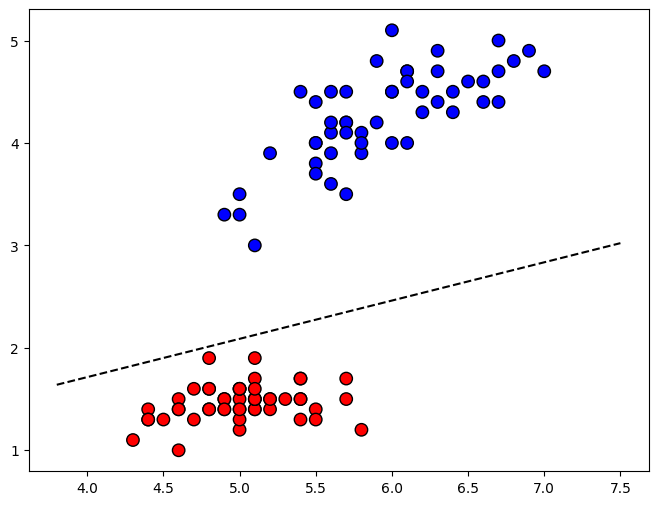

In [ ]:
# Plotting the data and decision boundary
plt.figure(figsize=(8,6))

# Scatter plot of the data
colors = ['red' if label == 1 else 'blue' for label in y]
plt.scatter(X[:, 0], X[:, 1], color=colors, edgecolor='k', s=80, label='Training data')

# Create a range of x values based on the feature's limits
x1_vals = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 100)
# print(x1_vals)
if w[2] != 0:
    x2_vals = -(w[0] + w[1] * x1_vals) / w[2]
    # print(x2_vals)
    plt.plot(x1_vals, x2_vals, 'k--', label='Decision boundary')
else:
    plt.axvline(-w[0]/w[1], color='k', linestyle='--', label='Decision boundary')

plt.show()